In [2]:
# Importando as bibliotecas necessárias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from stoneforge.preprocessing import las_import, depth_zones
from stoneforge.pseudo_wells import lithology_generator, monte_carlo_simulations, pseudo_tools
from stoneforge.vis import plito

In [3]:
# Importando os dados dos poços do Campo de massapê, Bacia do recôncavo, Bacia do Recôncavo
# 7 Poços foram selecionados para a análise

data_22,units_22 = las_import("D://appy_projetos//wells//7-MP-22-BA.las")
data_22 = data_22[['DEPTH','GR','RHOB','NPHI','DT','Lith_new']].dropna()
data_33,units_33 = las_import("D://appy_projetos//wells//7-MP-33D-BA.las")
data_33 = data_33[['DEPTH','GR','RHOB','NPHI','DT','Lith_new']].dropna()
data_38,units_38 = las_import("D://appy_projetos//wells//7-MP-38D-BA.las")
data_38 = data_38[['DEPTH','GR','RHOB','NPHI','DT','Lith_new']].dropna()
data_49,units_49 = las_import("D://appy_projetos//wells//7-MP-49D-BA.las")
data_49 = data_49[['DEPTH','GR','RHOZ','NPHI','DT','Lith_new']].dropna()
data_50,units_50 = las_import("D://appy_projetos//wells//7-MP-50D-BA.las")
data_50 = data_50[['DEPTH','GR','RHOB','NPHI','DT','Lith_new']].dropna()
data_56,units_56 = las_import("D://appy_projetos//wells//7-MP-56D-BA.las")
data_56 = data_56[['DEPTH','GR','RHOB','NPHI','DT','Lith_new']].dropna()
data_49 = data_49.rename(columns={"RHOZ": "RHOB"})

In [4]:
# Visualizando dados de uma tabela de poços
data_49

,DEPTH,GR,RHOB,NPHI,DT,Lith_new
1889,305.7144,68.1679,2.3941,-0.0251,116.5644,49.0
1890,305.8668,72.7200,2.3941,-0.0255,121.7132,49.0
1891,306.0192,70.1443,2.3941,-0.0260,128.9175,49.0
1892,306.1716,66.5558,2.3941,-0.0264,141.3369,49.0
1893,306.3240,63.7755,2.3941,-0.0269,146.9186,49.0
...,...,...,...,...,...,...
18982,2910.6876,42.6808,2.5013,0.0450,67.9459,49.0
18983,2910.8400,49.2733,2.5210,0.0494,67.9459,49.0
18984,2910.9924,52.4361,2.5425,0.0477,67.9459,49.0
18985,2911.1448,60.9180,2.5754,0.0567,67.9459,49.0


In [5]:
# Definindo o Padrão de cores para as litologias

colors = {
    57:"green",
    49:"yellow",
    54:"maroon",
    25:"grey"
}

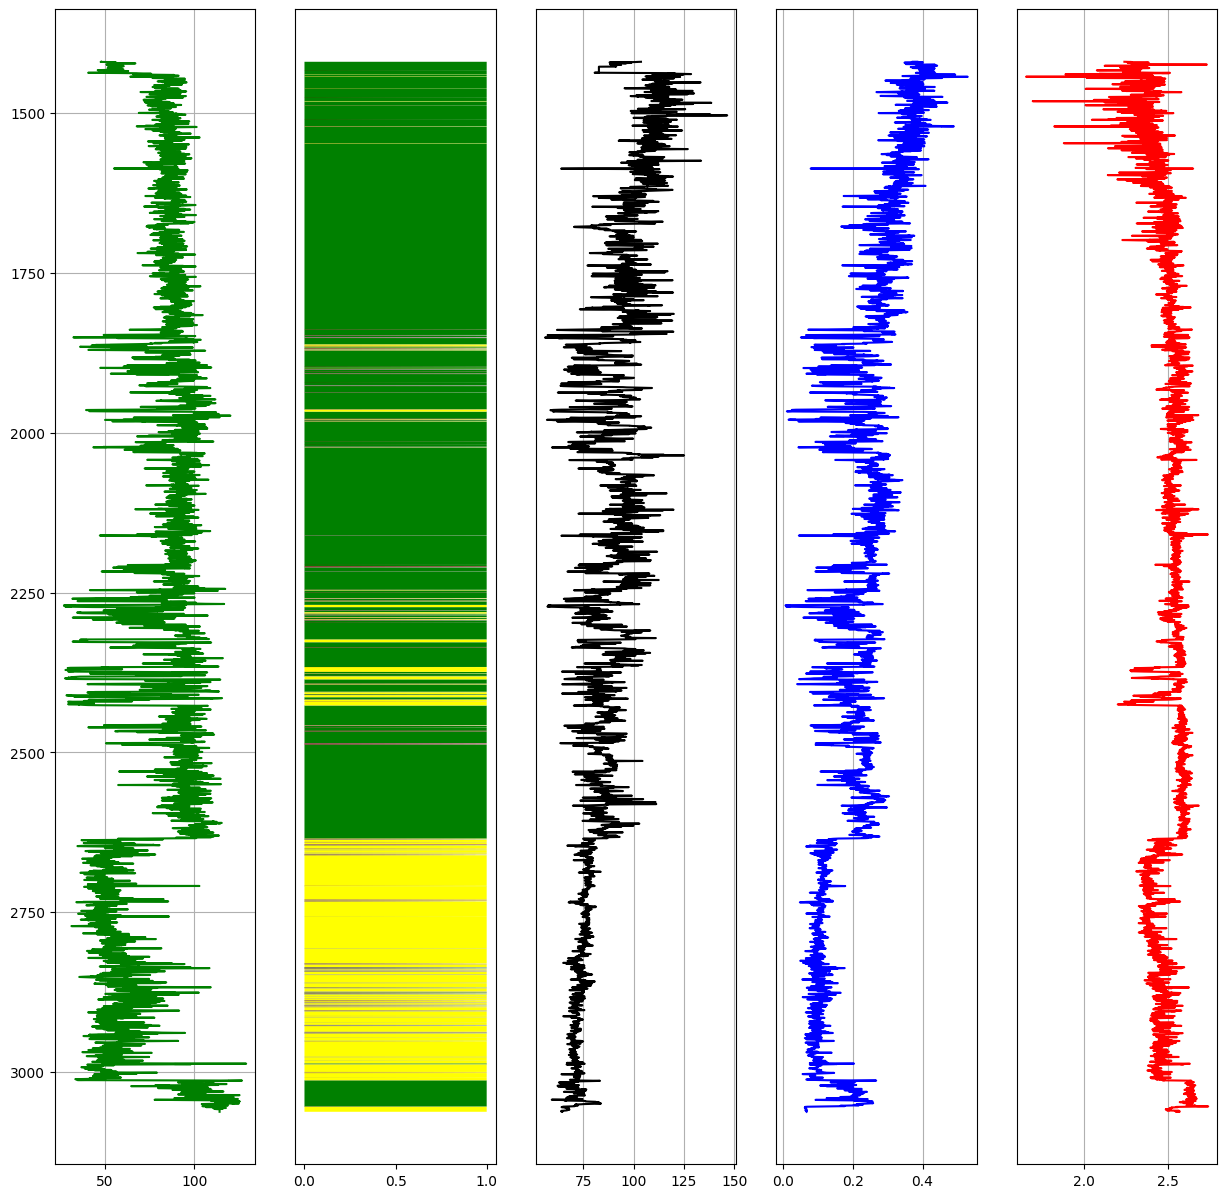

In [6]:
# Função para visualização de dados de poços (rápida)

def view_caruacu(df):

    colors = {
    57:"green",
    49:"yellow",
    54:"maroon",
    25:"grey"
    }

    plt.figure(figsize=(15,15))

    lito = np.array(df["Lith_new"])
    dept = np.array(df['DEPTH'])
    gr = np.array(df['GR'])
    dt = np.array(df['DT'])
    nphi = np.array(df['NPHI'])
    rhob = np.array(df['RHOB'])

    plt.subplot(1,5,1)
    plt.gca().invert_yaxis()
    plt.plot(gr,dept,'g')
    plt.grid()
    
    plt.subplot(1,5,2)
    plt.gca().invert_yaxis()
    plito(lito,dept,colors)
    plt.yticks([])

    plt.subplot(1,5,3)
    plt.gca().invert_yaxis()
    plt.plot(dt,dept,'k')
    plt.yticks([])
    plt.grid()

    plt.subplot(1,5,4)
    plt.gca().invert_yaxis()
    plt.plot(nphi,dept,'b')
    plt.yticks([])
    plt.grid()

    plt.subplot(1,5,5)
    plt.gca().invert_yaxis()
    plt.plot(rhob,dept,'r')
    plt.yticks([])
    plt.grid()

view_caruacu(data_22)
# 1750, 2600

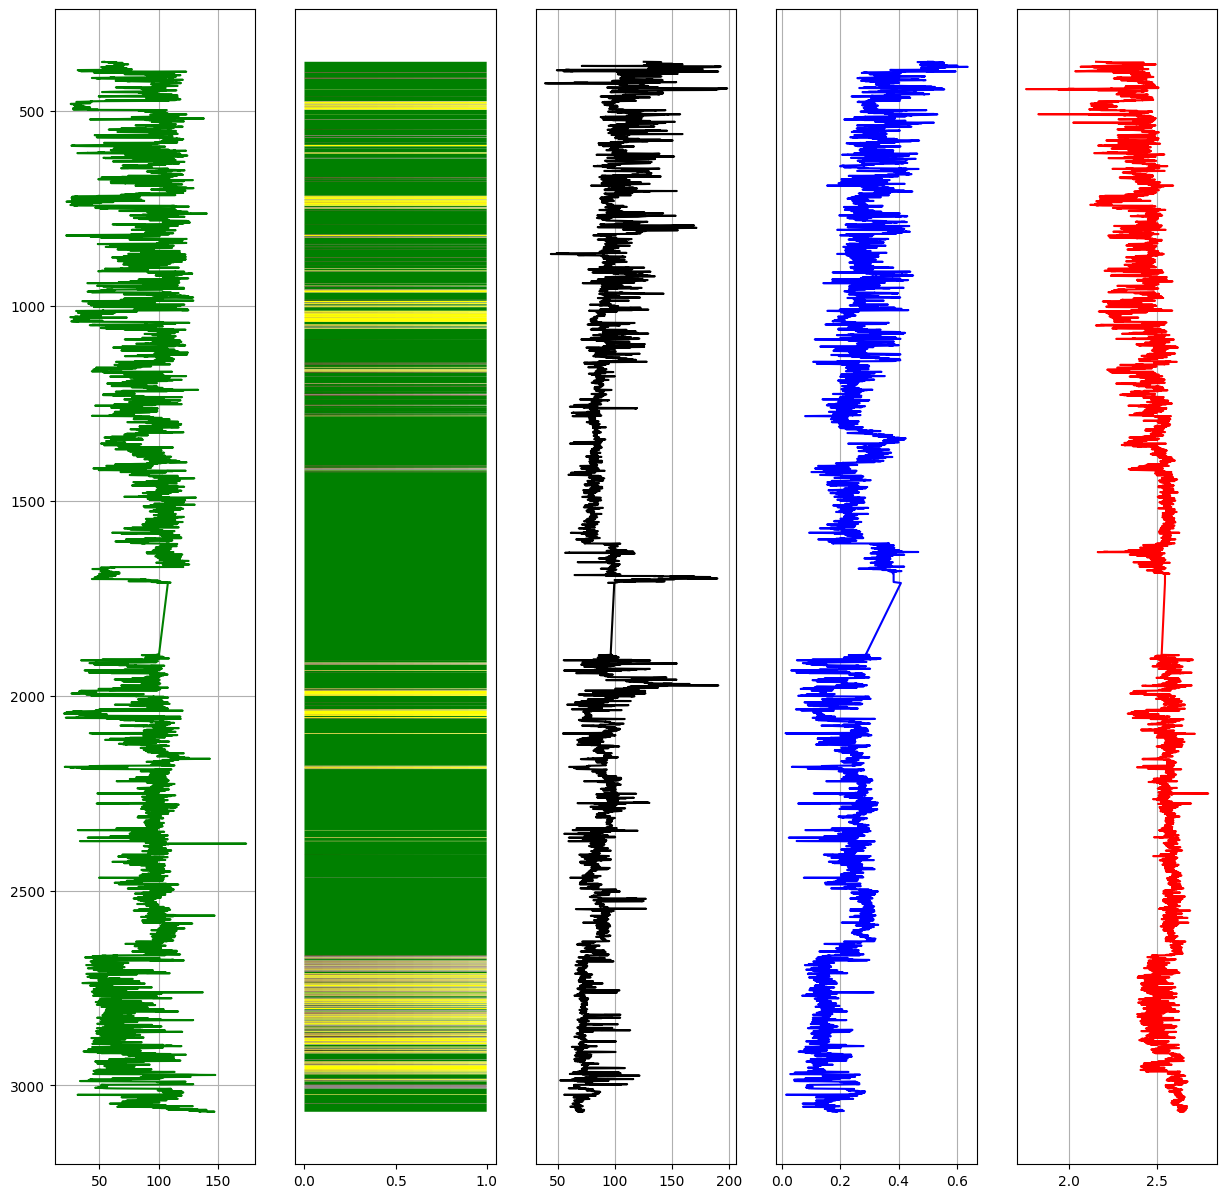

In [7]:
# Visualizando os dados de um poço e definindo os intervalos de interesse
# no caso foram 1100 e 2600 metros
# Isto divide o poço em 3 intervalos
# topo - 1100 a 1750, 2 - 1750 a 2600, 3 - 2600 a base

view_caruacu(data_33)
# 1100, 2600

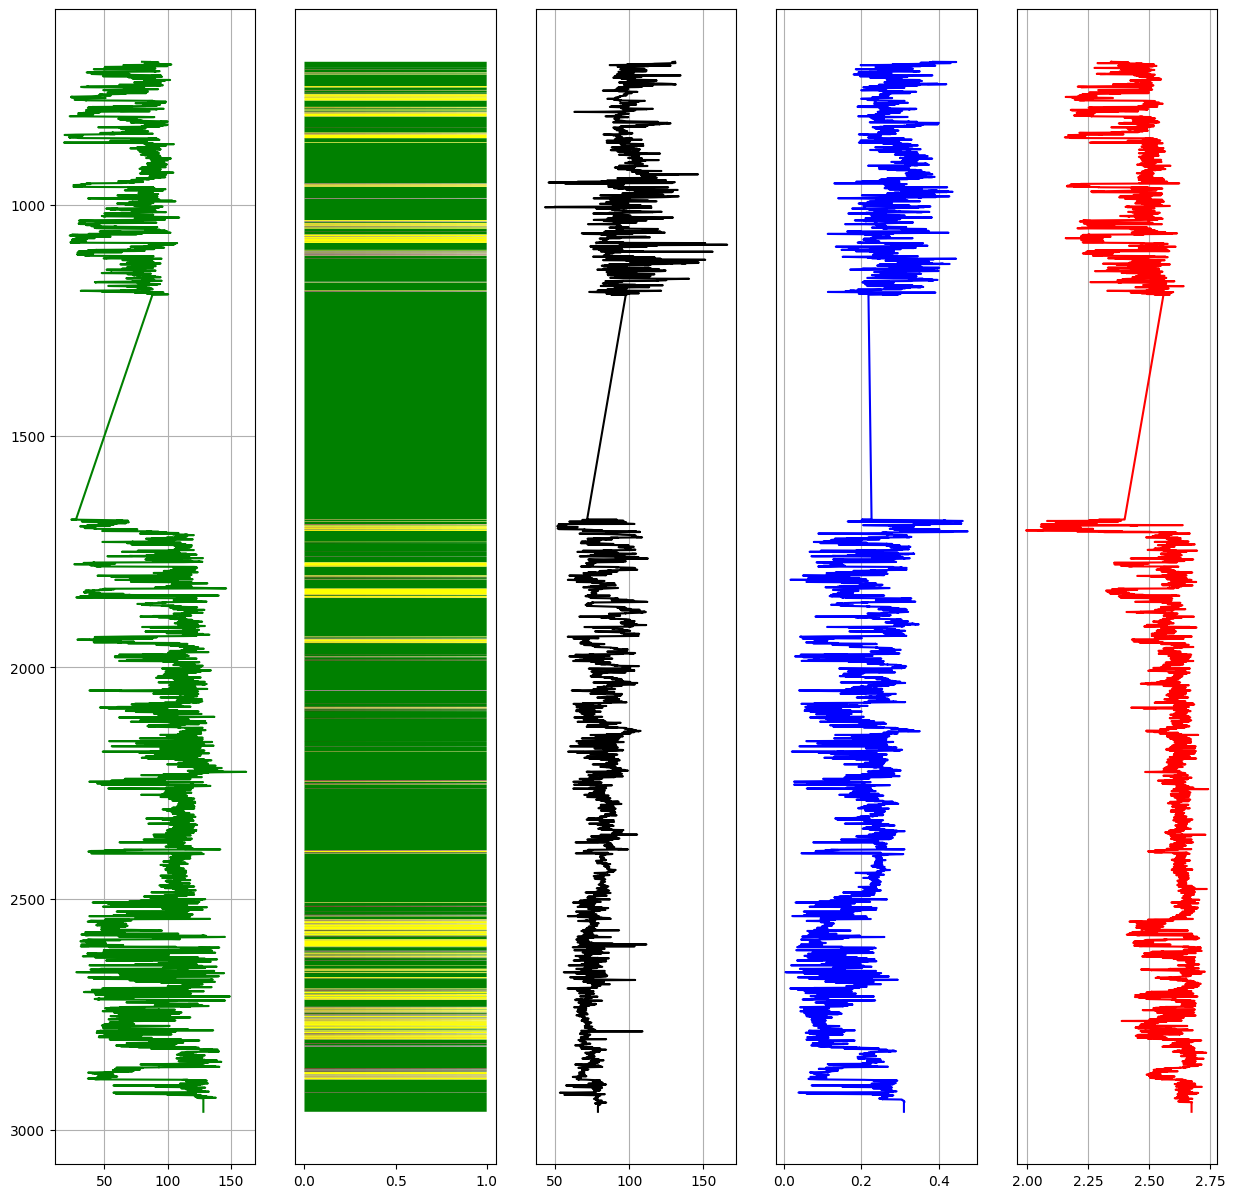

In [8]:
# Definidos dois intervalos de interesse para o poço 38

view_caruacu(data_38)
# 2500

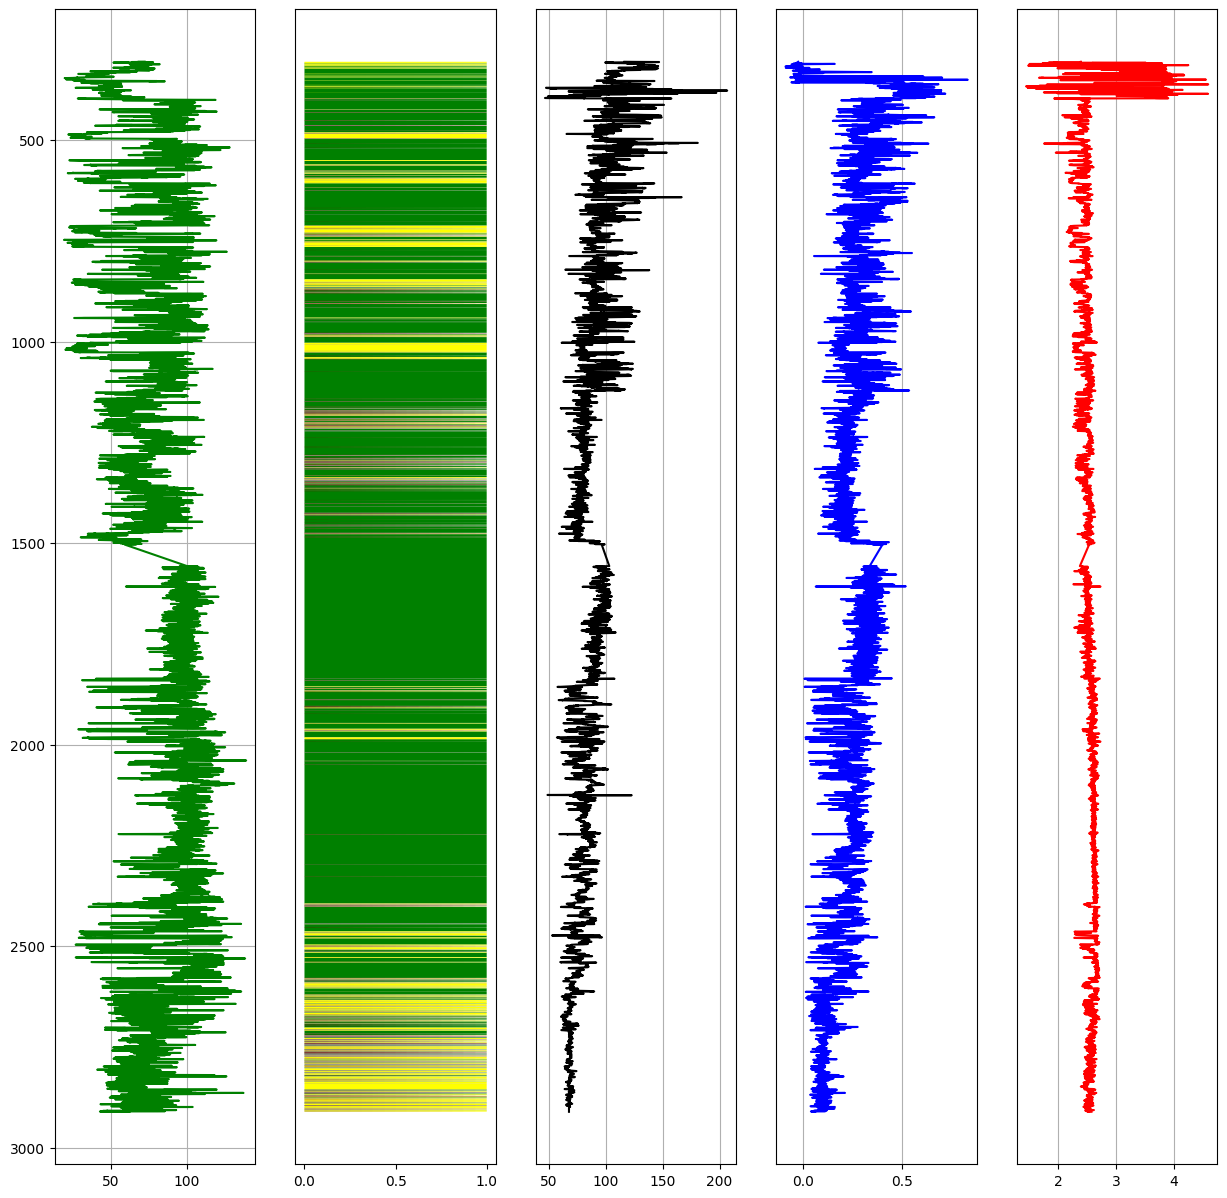

In [9]:
view_caruacu(data_49)
# 1100, 2400

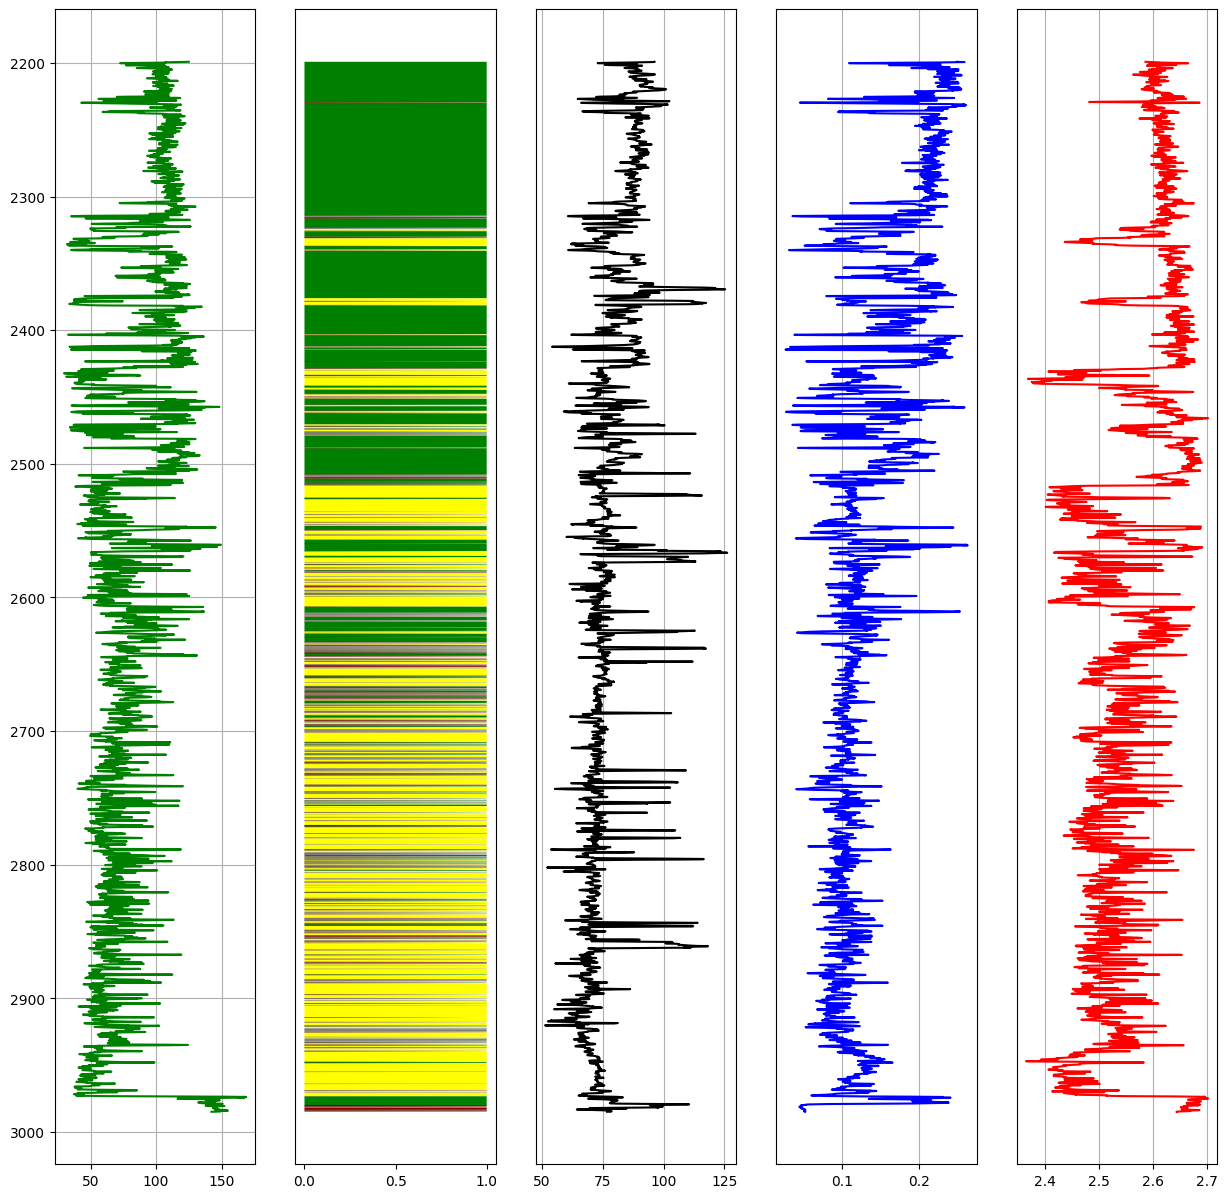

In [10]:
view_caruacu(data_50)
# 2400,2500 

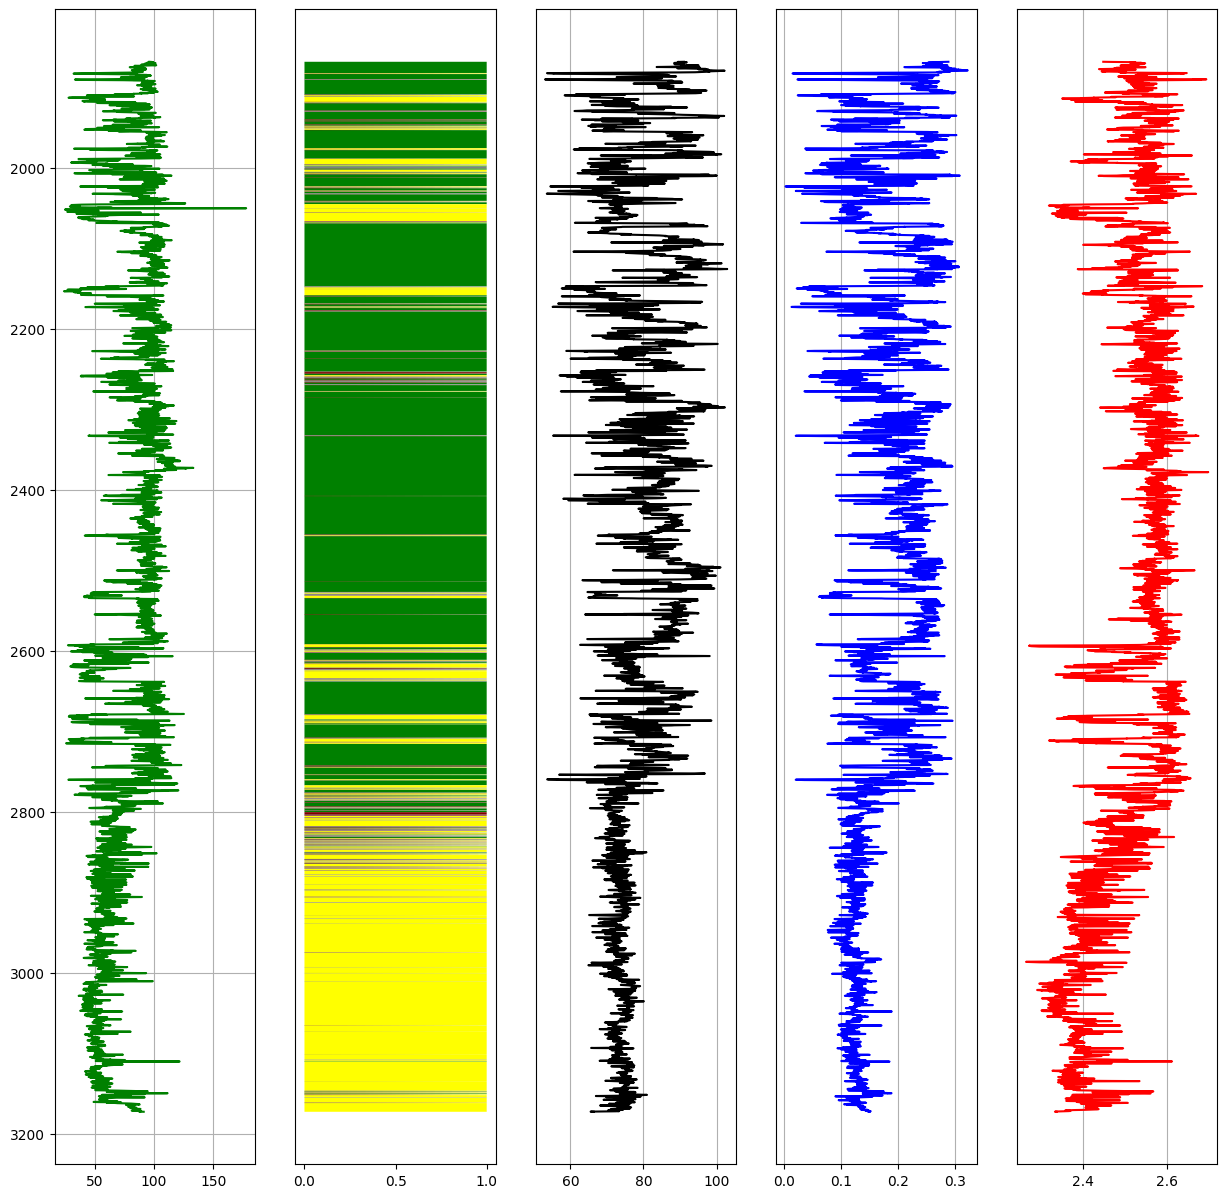

In [11]:
view_caruacu(data_56)
# 2200, 2600, 2800

In [12]:
# Usando a função depth_zones para dividir os poços em intervalos de interesse
# A função retorna um dicionário com os intervalos e o dataframe de cada intervalo
# No caso são 3 intervalos de profundidade (3 dataframes)

zones22 = depth_zones(data_22,'DEPTH',[1750, 2600])

print("Número de zonas:",len(zones22))
print(zones22)

Número de zonas: 3
{0:           DEPTH       GR    RHOB    NPHI        DT  Lith_new
14101  1420.025  47.9475  2.2387  0.3850  103.6000      57.0
14102  1420.125  47.7785  2.2604  0.3742  101.9000      57.0
14103  1420.225  47.6402  2.2743  0.3694  101.6000      57.0
14104  1420.325  48.7772  2.2801  0.3755  101.3000      57.0
14105  1420.425  50.6211  2.2732  0.3899  101.3000      57.0
...         ...      ...     ...     ...       ...       ...
17396  1749.525  90.9935  2.5109  0.2725  108.6327      57.0
17397  1749.625  90.6631  2.5045  0.2767  102.7959      57.0
17398  1749.725  90.4403  2.4971  0.2852   98.6939      57.0
17399  1749.825  88.8346  2.4949  0.2858   96.3883      57.0
17400  1749.925  87.6131  2.4945  0.2858   95.7291      57.0

[3300 rows x 6 columns], 1:           DEPTH        GR    RHOB    NPHI       DT  Lith_new
17401  1750.025   87.7360  2.5019  0.2806  95.5770      57.0
17402  1750.125   88.5504  2.5075  0.2792  95.2985      57.0
17403  1750.225   90.6477  2.5201

### Por que zonas?

- A litologia é uma informação categórica, e pode identificar regiões com maiores homogeneidades no dado geofísico.
- A litologia está fortemente associada com o ambiente e com o processo deposicional.

- Mas as litologias nao correspondem a única subdivisào do dado, existem também Facies e Zonas, sendo a primeira mais respectiva a composição das rochas, e a segunda é uma subdivisão do espaço vertical.

- As zonas também apresentam uma maior heterogeneidade do dado, mas não é tão específica quanto a litologia, e pode estar associada a algum evento deposicional específico.



In [13]:
# O mesmo para as demais zonas


zones33 = depth_zones(data_33,'DEPTH',[1100, 2600])
zones38 = depth_zones(data_38,'DEPTH',[2500])
zones49 = depth_zones(data_49,'DEPTH',[1100, 2400])
zones50 = depth_zones(data_50,'DEPTH',[2400,2500])
zones56 = depth_zones(data_56,'DEPTH',[2200, 2600, 2800])

In [14]:
# Aglutinando os dataframes de cada zona em um único dataframe
# ex: zone1 = zona 1 do poço 22 + zona 1 do poço 33 + ...

zone1 = [zones22[0], zones33[1], zones49[1], zones56[1]]
df_z1 = pd.concat(zone1)

zone2 = [zones22[1], zones33[0], zones38[0], zones49[0], zones50[0], zones56[0], zones56[2]]
df_z2 = pd.concat(zone2)

zone3 = [zones22[2], zones33[2], zones38[1], zones49[2], zones50[2], zones56[3]]
df_z3 = pd.concat(zone3)

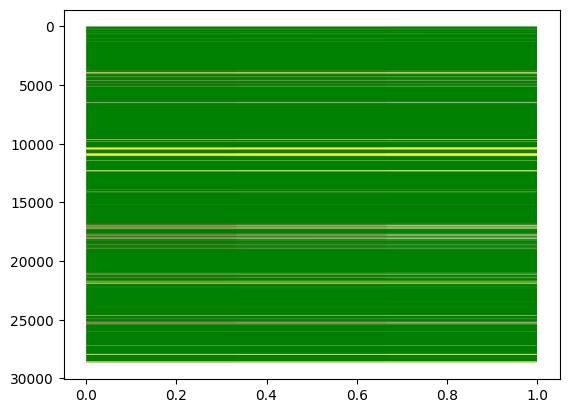

In [15]:
# Resultado da Zona 1

lz1 = np.array(df_z1['Lith_new'])
ldp = np.linspace(0,len(lz1),len(lz1))
plito(lz1,ldp,colors)
plt.gca().invert_yaxis()

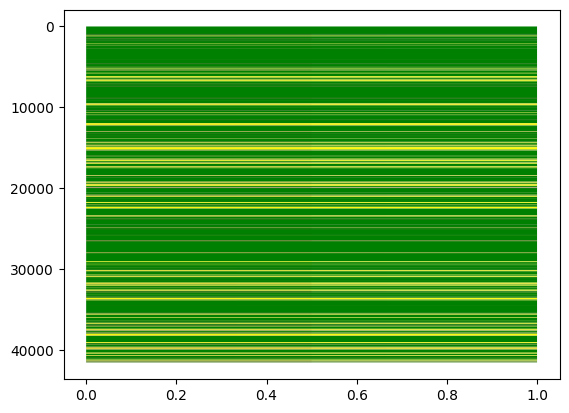

In [16]:
# Resultado da Zona 2

lz2 = np.array(df_z2['Lith_new'])
ldp = np.linspace(0,len(lz2),len(lz2))
plito(lz2,ldp,colors)
plt.gca().invert_yaxis()

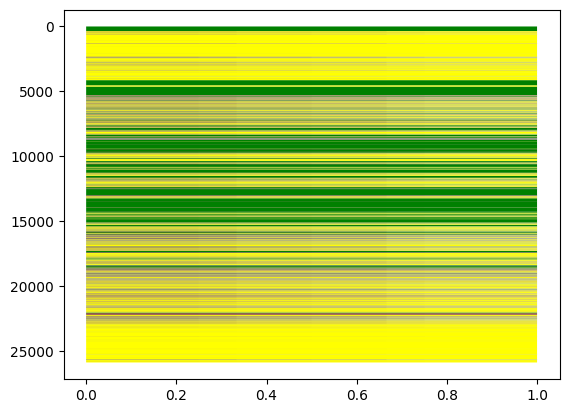

In [17]:
# Resultado da Zona 3

lz3 = np.array(df_z3['Lith_new'])
ldp = np.linspace(0,len(lz3),len(lz3))
plito(lz3,ldp,colors)
plt.gca().invert_yaxis()

## Zone 1

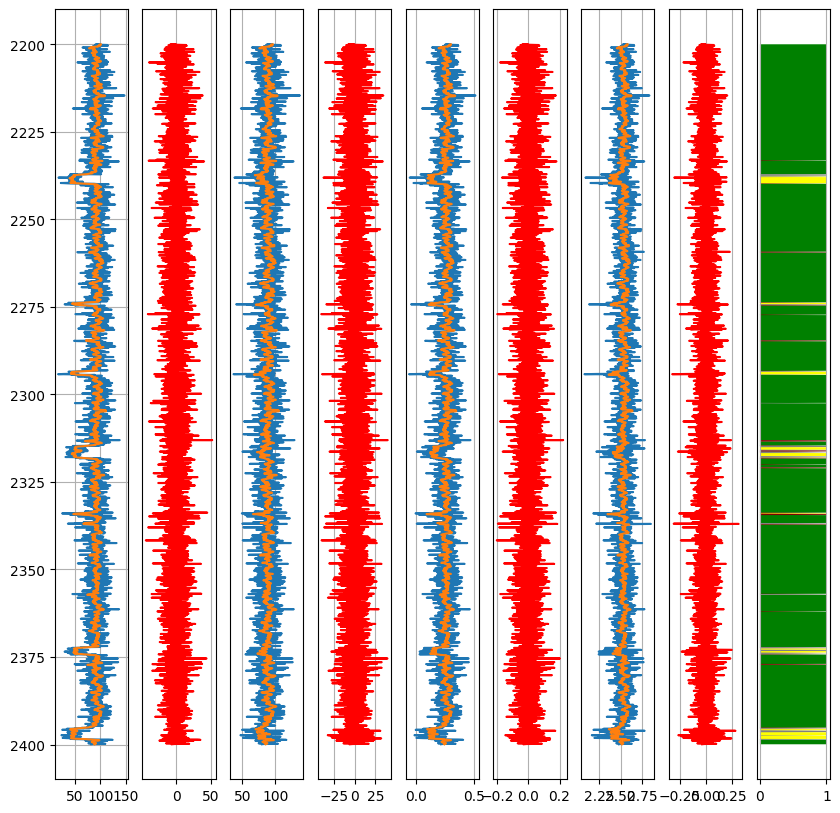

In [18]:
# Calculando o pseudo poço respectivo a zona 1
# Mais detalhes desta função podem ser encontrados em: 
# https://github.com/giecaruff/stoneforge/blob/stoneforge0.1.6/examples/pseudo_wells.ipynb

# Profundidade gerada por interpolação linear (definida pelo usuário)
depth1 = np.arange(2200,2400 - 0.07,0.07)

# Geração de um modelo de Markov para a zona 1
M,st = lithology_generator.markov_chain(np.array(lz1))

# Geração de um pseudo perfil de litologias para a zona 1 (referência)
lito_s1 = lithology_generator.simple(markov_chain=M,sampling=len(depth1),lithology_code=st,initial_state=57)

# Estatísticas dos logs de GR, DT, NPHI e RHOB para a zona 1
# em essência, a função retorna a média e o desvio padrão de cada log para cada litologia

stats_gr = pseudo_tools.log_statstics(np.array(df_z1["GR"]),np.array(df_z1["Lith_new"]))
stats_dt = pseudo_tools.log_statstics(np.array(df_z1["DT"]),np.array(df_z1["Lith_new"]))
stats_nphi = pseudo_tools.log_statstics(np.array(df_z1["NPHI"]),np.array(df_z1["Lith_new"]))
stats_rhob = pseudo_tools.log_statstics(np.array(df_z1["RHOB"]),np.array(df_z1["Lith_new"]))

# Geração de logs sintéticos por simulação de Monte Carlo utilizando as estatísticas calculadas acima
S_GR1 = pseudo_tools.synthetic_log(stats_gr, lithology = lito_s1, seed=42)
S_DT1 = pseudo_tools.synthetic_log(stats_dt, lithology = lito_s1, seed=42)
S_NPHI1 = pseudo_tools.synthetic_log(stats_nphi, lithology = lito_s1, seed=42)
S_RHOB1 = pseudo_tools.synthetic_log(stats_rhob, lithology = lito_s1, seed=42)

# Suavização dos logs sintéticos por média móvel para cada perfil
GR_smooth = pseudo_tools.moving_average(S_GR1, step = 5)
DT_smooth = pseudo_tools.moving_average(S_DT1, step = 5)
NPHI_smooth = pseudo_tools.moving_average(S_NPHI1, step = 5)
RHOB_smooth = pseudo_tools.moving_average(S_RHOB1, step = 5)

# Cálculo da diferença entre os logs sintéticos e os logs suavizados (que em tese corresponde ao ruído)
dif_GR = S_GR1 - GR_smooth
dif_DT = S_DT1 - DT_smooth
dif_NPHI = S_NPHI1 - NPHI_smooth
dif_RHOB = S_RHOB1 - RHOB_smooth

# Visualização dos logs sintéticos e suavizados para a zona 1
plt.figure(figsize=(10,10))

plt.subplot(1,9,1)
plt.gca().invert_yaxis()
plt.plot(S_GR1,depth1)
plt.plot(GR_smooth,depth1)
plt.grid()

plt.subplot(1,9,2)
plt.gca().invert_yaxis()
plt.plot(dif_GR,depth1,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,3)
plt.gca().invert_yaxis()
plt.plot(S_DT1,depth1)
plt.plot(DT_smooth,depth1)
plt.yticks([])
plt.grid()

plt.subplot(1,9,4)
plt.gca().invert_yaxis()
plt.plot(dif_DT,depth1,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,5)
plt.gca().invert_yaxis()
plt.plot(S_NPHI1,depth1)
plt.plot(NPHI_smooth,depth1)
plt.yticks([])
plt.grid()

plt.subplot(1,9,6)
plt.gca().invert_yaxis()
plt.plot(dif_NPHI,depth1,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,7)
plt.gca().invert_yaxis()
plt.plot(S_RHOB1,depth1)
plt.plot(RHOB_smooth,depth1)
plt.yticks([])
plt.grid()

plt.subplot(1,9,8)
plt.gca().invert_yaxis()
plt.plot(dif_RHOB,depth1,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,9)
plt.gca().invert_yaxis()
plito(lito_s1,depth1,colors)
plt.yticks([])
plt.grid()
plt.show()

## Zone 2

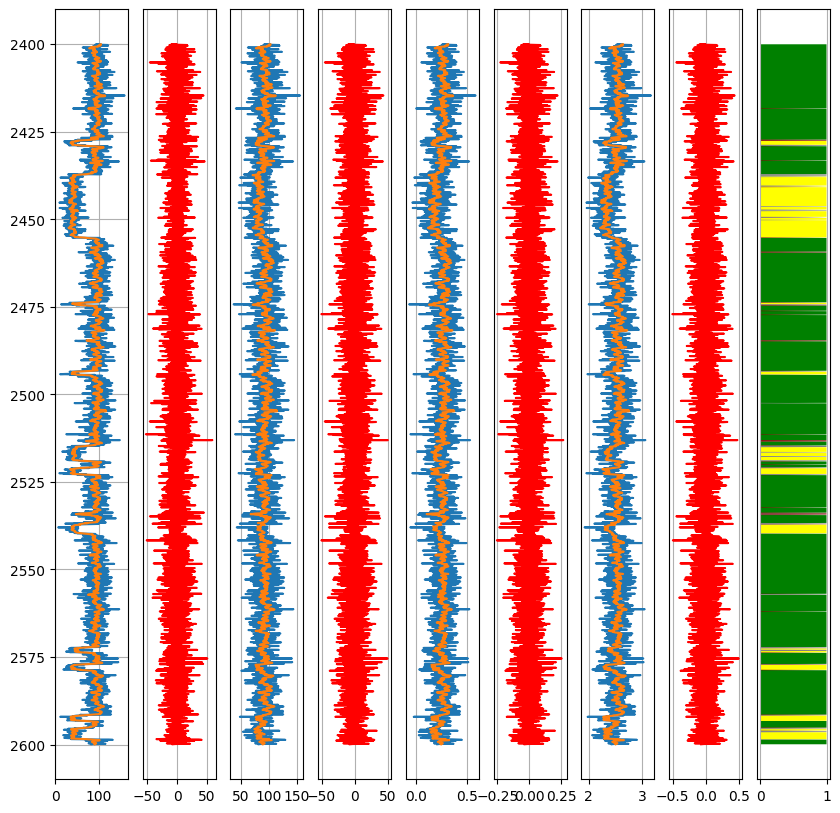

In [19]:
# O mesmo que foi feito para a zona 1, agora feito para a zona 2
depth2 = np.arange(2400,2600 - 0.07,0.07)

M,st = lithology_generator.markov_chain(np.array(lz2))

lito_s2 = lithology_generator.simple(markov_chain=M,sampling=len(depth2),lithology_code=st,initial_state=57)

stats_gr = pseudo_tools.log_statstics(np.array(df_z2["GR"]),np.array(df_z2["Lith_new"]))
stats_dt = pseudo_tools.log_statstics(np.array(df_z2["DT"]),np.array(df_z2["Lith_new"]))
stats_nphi = pseudo_tools.log_statstics(np.array(df_z2["NPHI"]),np.array(df_z2["Lith_new"]))
stats_rhob = pseudo_tools.log_statstics(np.array(df_z2["RHOB"]),np.array(df_z2["Lith_new"]))

S_GR2 = pseudo_tools.synthetic_log(stats_gr, lithology = lito_s2, seed=42)
S_DT2 = pseudo_tools.synthetic_log(stats_dt, lithology = lito_s2, seed=42)
S_NPHI2 = pseudo_tools.synthetic_log(stats_nphi, lithology = lito_s2, seed=42)
S_RHOB2 = pseudo_tools.synthetic_log(stats_rhob, lithology = lito_s2, seed=42)

GR_smooth = pseudo_tools.moving_average(S_GR2, step = 5)
DT_smooth = pseudo_tools.moving_average(S_DT2, step = 5)
NPHI_smooth = pseudo_tools.moving_average(S_NPHI2, step = 5)
RHOB_smooth = pseudo_tools.moving_average(S_RHOB2, step = 5)

dif_GR = S_GR2 - GR_smooth
dif_DT = S_DT2 - DT_smooth
dif_NPHI = S_NPHI2 - NPHI_smooth
dif_RHOB = S_RHOB2 - RHOB_smooth

plt.figure(figsize=(10,10))

plt.subplot(1,9,1)
plt.gca().invert_yaxis()
plt.plot(S_GR2,depth2)
plt.plot(GR_smooth,depth2)
plt.grid()

plt.subplot(1,9,2)
plt.gca().invert_yaxis()
plt.plot(dif_GR,depth2,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,3)
plt.gca().invert_yaxis()
plt.plot(S_DT2,depth2)
plt.plot(DT_smooth,depth2)
plt.yticks([])
plt.grid()

plt.subplot(1,9,4)
plt.gca().invert_yaxis()
plt.plot(dif_DT,depth2,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,5)
plt.gca().invert_yaxis()
plt.plot(S_NPHI2,depth2)
plt.plot(NPHI_smooth,depth2)
plt.yticks([])
plt.grid()

plt.subplot(1,9,6)
plt.gca().invert_yaxis()
plt.plot(dif_NPHI,depth2,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,7)
plt.gca().invert_yaxis()
plt.plot(S_RHOB2,depth2)
plt.plot(RHOB_smooth,depth2)
plt.yticks([])
plt.grid()

plt.subplot(1,9,8)
plt.gca().invert_yaxis()
plt.plot(dif_RHOB,depth2,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,9)
plt.gca().invert_yaxis()
plito(lito_s2,depth2,colors)
plt.yticks([])
plt.grid()
plt.show()

## zone 3

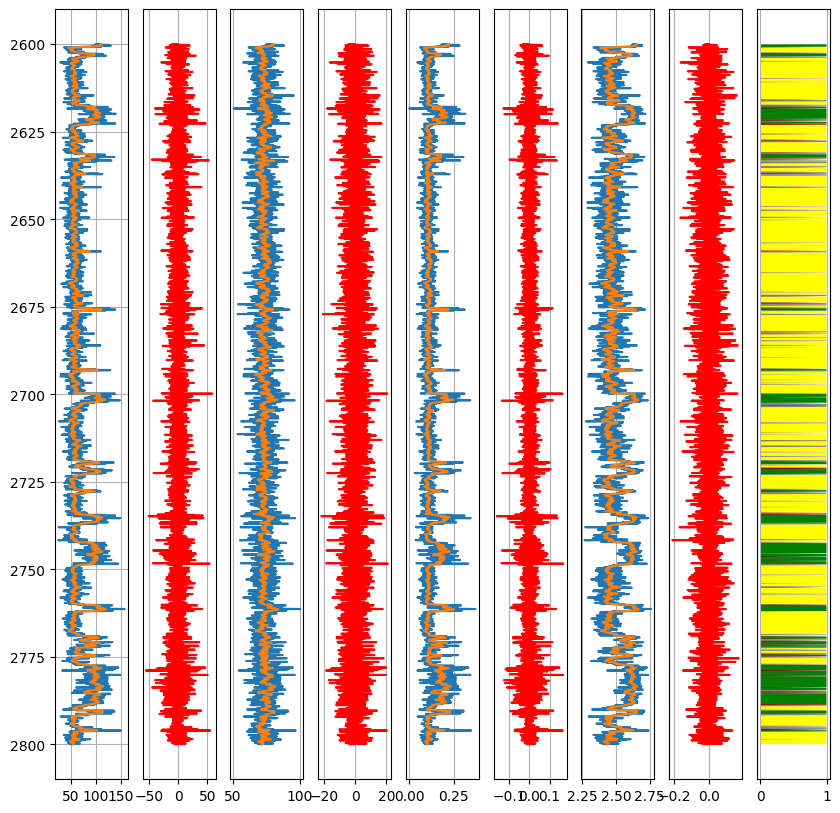

In [20]:
# O mesmo que foi feito para a zona 1 e 2, agora feito para a zona 3
depth3 = np.arange(2600,2800,0.07)

M,st = lithology_generator.markov_chain(np.array(lz3))

lito_s3 = lithology_generator.simple(markov_chain=M,sampling=len(depth3),lithology_code=st,initial_state=57)

stats_gr = pseudo_tools.log_statstics(np.array(df_z3["GR"]),np.array(df_z3["Lith_new"]))
stats_dt = pseudo_tools.log_statstics(np.array(df_z3["DT"]),np.array(df_z3["Lith_new"]))
stats_nphi = pseudo_tools.log_statstics(np.array(df_z3["NPHI"]),np.array(df_z3["Lith_new"]))
stats_rhob = pseudo_tools.log_statstics(np.array(df_z3["RHOB"]),np.array(df_z3["Lith_new"]))

S_GR3 = pseudo_tools.synthetic_log(stats_gr, lithology = lito_s3, seed=42)
S_DT3 = pseudo_tools.synthetic_log(stats_dt, lithology = lito_s3, seed=42)
S_NPHI3 = pseudo_tools.synthetic_log(stats_nphi, lithology = lito_s3, seed=42)
S_RHOB3 = pseudo_tools.synthetic_log(stats_rhob, lithology = lito_s3, seed=42)

GR_smooth = pseudo_tools.moving_average(S_GR3, step = 5)
DT_smooth = pseudo_tools.moving_average(S_DT3, step = 5)
NPHI_smooth = pseudo_tools.moving_average(S_NPHI3, step = 5)
RHOB_smooth = pseudo_tools.moving_average(S_RHOB3, step = 5)

dif_GR = S_GR3 - GR_smooth
dif_DT = S_DT3 - DT_smooth
dif_NPHI = S_NPHI3 - NPHI_smooth
dif_RHOB = S_RHOB3 - RHOB_smooth

plt.figure(figsize=(10,10))

plt.subplot(1,9,1)
plt.gca().invert_yaxis()
plt.plot(S_GR3,depth3)
plt.plot(GR_smooth,depth3)
plt.grid()

plt.subplot(1,9,2)
plt.gca().invert_yaxis()
plt.plot(dif_GR,depth3,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,3)
plt.gca().invert_yaxis()
plt.plot(S_DT3,depth3)
plt.plot(DT_smooth,depth3)
plt.yticks([])
plt.grid()

plt.subplot(1,9,4)
plt.gca().invert_yaxis()
plt.plot(dif_DT,depth3,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,5)
plt.gca().invert_yaxis()
plt.plot(S_NPHI3,depth3)
plt.plot(NPHI_smooth,depth3)
plt.yticks([])
plt.grid()

plt.subplot(1,9,6)
plt.gca().invert_yaxis()
plt.plot(dif_NPHI,depth3,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,7)
plt.gca().invert_yaxis()
plt.plot(S_RHOB3,depth3)
plt.plot(RHOB_smooth,depth3)
plt.yticks([])
plt.grid()

plt.subplot(1,9,8)
plt.gca().invert_yaxis()
plt.plot(dif_RHOB,depth3,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,9)
plt.gca().invert_yaxis()
plito(lito_s3,depth3,colors)
plt.yticks([])
plt.grid()
plt.show()

## Adding noise

Após calcular os perfis suavizados para as propriedades petrofísicas: GR, DT, NPHI e RHOB
E de remover o ruído associado a cada perfil
vamos gerar o ruído sintético para ser incorporado ao perfil suavizado

In [21]:
# selecionando o dado real de cada zona e aglutinando tudo em um perfilzão gigante
# NOTE: talvez a melhor maneira de determinar o ruído seja utilizar um poço só e não todos os poços

R_DEPTH_real = np.array(list(df_z1['DEPTH']) + list(df_z2['DEPTH']) + list(df_z3['DEPTH']))
R_GR = np.array(list(df_z1['GR']) + list(df_z2['GR']) + list(df_z3['GR']))
R_DT = np.array(list(df_z1['DT']) + list(df_z2['DT']) + list(df_z3['DT']))
R_NPHI = np.array(list(df_z1['NPHI']) + list(df_z2['NPHI']) + list(df_z3['NPHI']))
R_RHOB = np.array(list(df_z1['RHOB']) + list(df_z2['RHOB']) + list(df_z3['RHOB']))
R_LITO = np.array(list(df_z1['Lith_new']) + list(df_z2['Lith_new']) + list(df_z3['Lith_new']))
R_DEPTH = np.linspace(0,len(R_GR),len(R_GR))

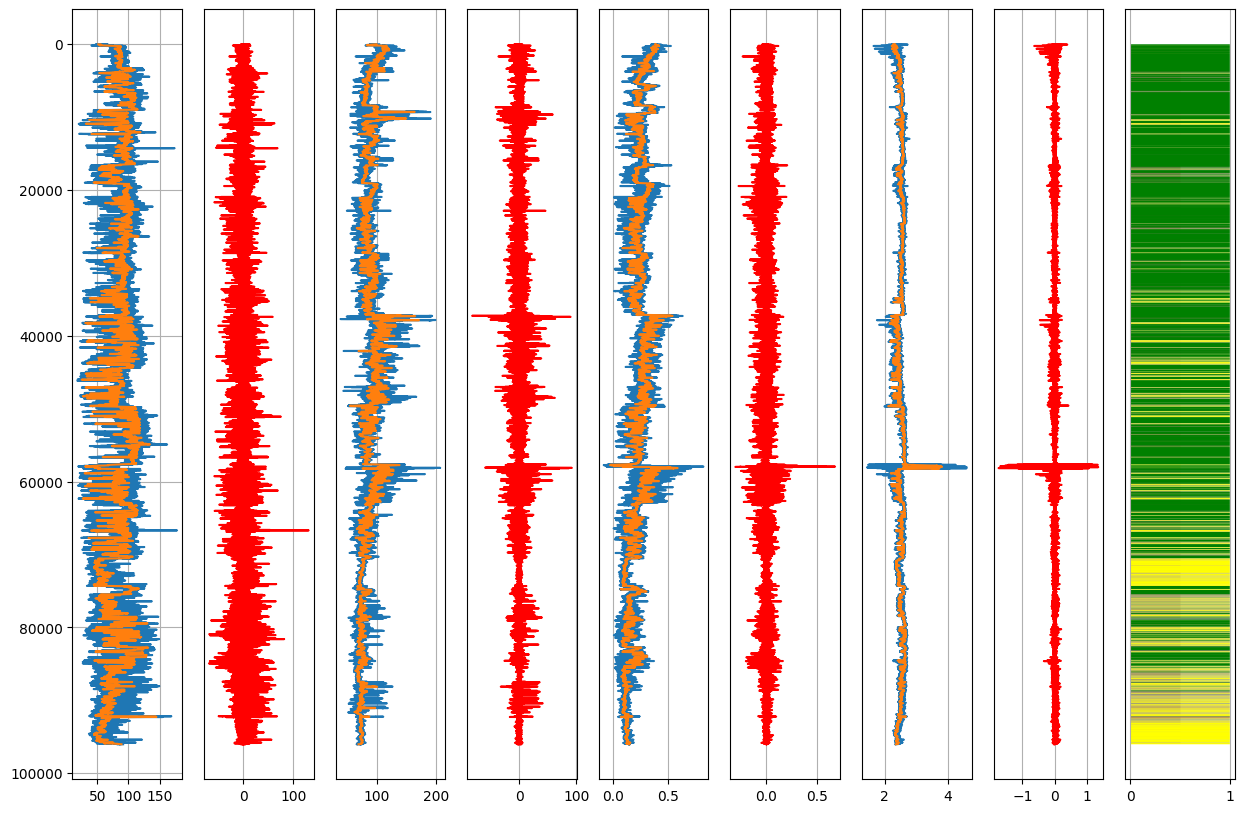

In [22]:

smooth_step = 70

# Perfis Reais suavisados por média móvel (nota, aqui é um perfil com vários poços)
GR_smooth_R = pseudo_tools.moving_average(R_GR, step = smooth_step)
DT_smooth_R = pseudo_tools.moving_average(R_DT, step = smooth_step)
NPHI_smooth_R = pseudo_tools.moving_average(R_NPHI, step = smooth_step)
RHOB_smooth_R = pseudo_tools.moving_average(R_RHOB, step = smooth_step)

# Cálculo da diferença entre os logs reais e os logs suavizados (que em tese corresponde ao ruído)
dif_GR_R = R_GR - GR_smooth_R
dif_DT_R = R_DT - DT_smooth_R
dif_NPHI_R = R_NPHI - NPHI_smooth_R
dif_RHOB_R = R_RHOB - RHOB_smooth_R

# =============================================================== #

plt.figure(figsize=(15,10))

plt.subplot(1,9,1)
plt.gca().invert_yaxis()
plt.plot(R_GR,R_DEPTH)
plt.plot(GR_smooth_R,R_DEPTH)
plt.grid()

plt.subplot(1,9,2)
plt.gca().invert_yaxis()
plt.plot(dif_GR_R,R_DEPTH,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,3)
plt.gca().invert_yaxis()
plt.plot(R_DT,R_DEPTH)
plt.plot(DT_smooth_R,R_DEPTH)
plt.yticks([])
plt.grid()

plt.subplot(1,9,4)
plt.gca().invert_yaxis()
plt.plot(dif_DT_R,R_DEPTH,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,5)
plt.gca().invert_yaxis()
plt.plot(R_NPHI,R_DEPTH)
plt.plot(NPHI_smooth_R,R_DEPTH)
plt.yticks([])
plt.grid()

plt.subplot(1,9,6)
plt.gca().invert_yaxis()
plt.plot(dif_NPHI_R,R_DEPTH,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,7)
plt.gca().invert_yaxis()
plt.plot(R_RHOB,R_DEPTH)
plt.plot(RHOB_smooth_R,R_DEPTH)
plt.yticks([])
plt.grid()

plt.subplot(1,9,8)
plt.gca().invert_yaxis()
plt.plot(dif_RHOB_R,R_DEPTH,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,9)
plt.gca().invert_yaxis()
plito(R_LITO,R_DEPTH,colors)
plt.yticks([])
plt.grid()
plt.show()

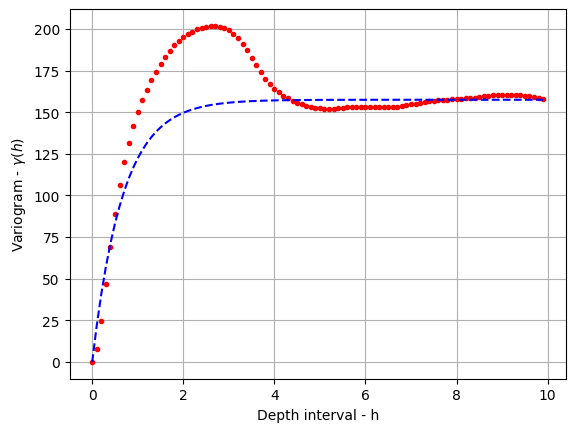

In [23]:
# calculando o variograma para o perfil de GR
# O objetivo é determinar que variograma corresponde melhor a relação entre o ruído em GR e a profundidade
# h é o intervalo de amostragem, ou seja, a distância entre os pontos amostrados

vm_gr = monte_carlo_simulations.variogram_model(dif_GR_R,R_DEPTH_real,step=100)
vm_gr.graph(2.)

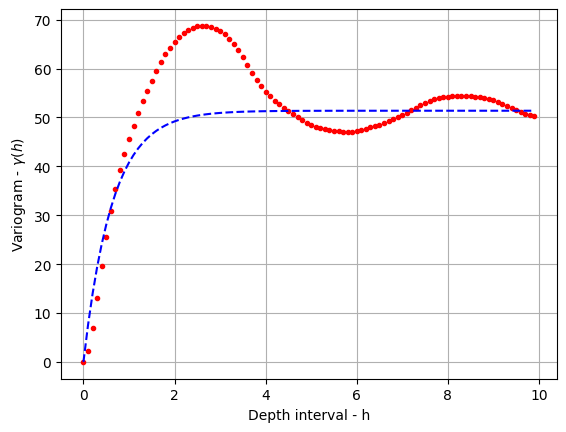

In [24]:
vm_dt = monte_carlo_simulations.variogram_model(dif_DT_R,R_DEPTH_real,step=100)
vm_dt.graph(1.9)

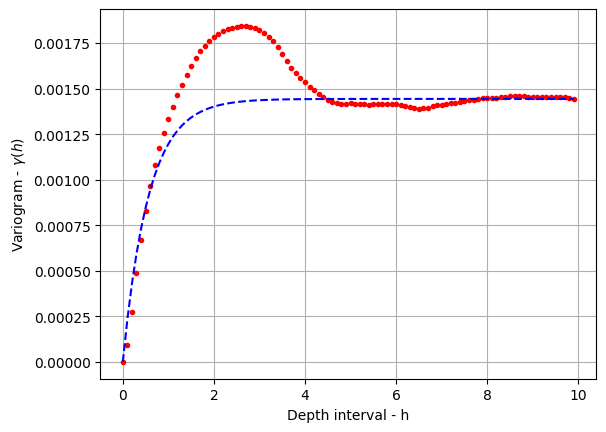

In [25]:
vm_nphi = monte_carlo_simulations.variogram_model(dif_NPHI_R,R_DEPTH_real,step=100)
vm_nphi.graph(1.7)

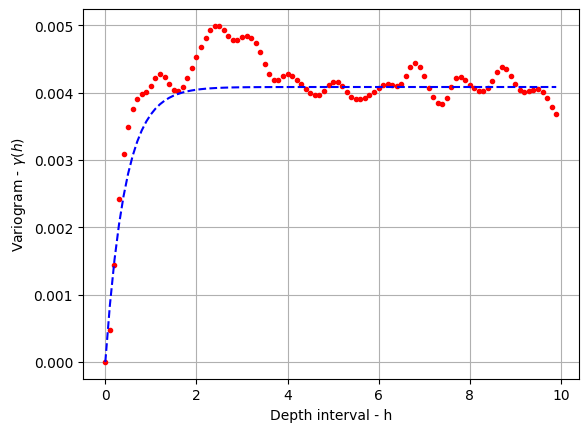

In [26]:
vm_rhob = monte_carlo_simulations.variogram_model(dif_RHOB_R,R_DEPTH_real,step=100)
vm_rhob.graph(1.3)

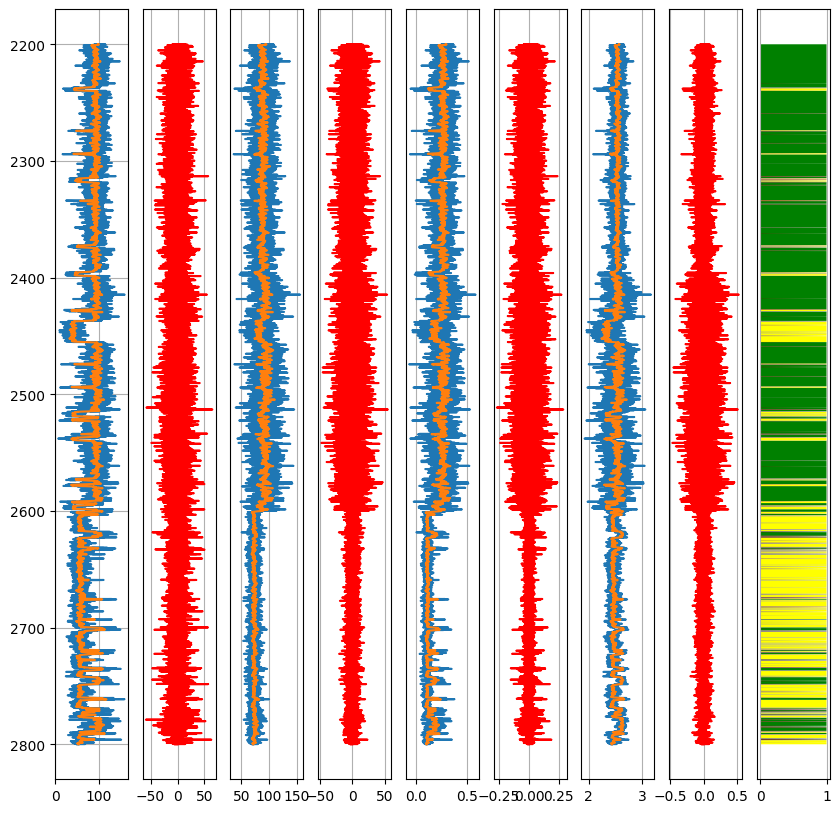

In [27]:
# Incorporando o ruído nos logs sintéticos
# Abaixo estão os logs sintéticos calculados nas porçoes anteriores (para cada zona)
# Eles foram alculados para cada zona individual, mas agora serão incorporados em um único perfil

S_LITO = np.array(list(lito_s1) + list(lito_s2) + list(lito_s3))
S_DEPTH = np.array(list(depth1) + list(depth2) + list(depth3))
S_GR = np.array(list(S_GR1) + list(S_GR2) + list(S_GR3))
S_DT = np.array(list(S_DT1) + list(S_DT2) + list(S_DT3))
S_NPHI = np.array(list(S_NPHI1) + list(S_NPHI2) + list(S_NPHI3))
S_RHOB = np.array(list(S_RHOB1) + list(S_RHOB2) + list(S_RHOB3))

# Suavização dos logs sintéticos por média móvel
GR_smooth = pseudo_tools.moving_average(S_GR, step = 10)
DT_smooth = pseudo_tools.moving_average(S_DT, step = 10)
NPHI_smooth = pseudo_tools.moving_average(S_NPHI, step = 10)
RHOB_smooth = pseudo_tools.moving_average(S_RHOB, step = 10)

# Cálculo da diferença entre os logs sintéticos e os logs suavizados
# Não será utilizada, é só para visualização
dif_GR = S_GR - GR_smooth
dif_DT = S_DT - DT_smooth
dif_NPHI = S_NPHI - NPHI_smooth
dif_RHOB = S_RHOB - RHOB_smooth

# =============================================================== #

plt.figure(figsize=(10,10))

plt.subplot(1,9,1)
plt.gca().invert_yaxis()
plt.plot(S_GR,S_DEPTH)
plt.plot(GR_smooth,S_DEPTH)
plt.grid()

plt.subplot(1,9,2)
plt.gca().invert_yaxis()
plt.plot(dif_GR,S_DEPTH,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,3)
plt.gca().invert_yaxis()
plt.plot(S_DT,S_DEPTH)
plt.plot(DT_smooth,S_DEPTH)
plt.yticks([])
plt.grid()

plt.subplot(1,9,4)
plt.gca().invert_yaxis()
plt.plot(dif_DT,S_DEPTH,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,5)
plt.gca().invert_yaxis()
plt.plot(S_NPHI,S_DEPTH)
plt.plot(NPHI_smooth,S_DEPTH)
plt.yticks([])
plt.grid()

plt.subplot(1,9,6)
plt.gca().invert_yaxis()
plt.plot(dif_NPHI,S_DEPTH,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,7)
plt.gca().invert_yaxis()
plt.plot(S_RHOB,S_DEPTH)
plt.plot(RHOB_smooth,S_DEPTH)
plt.yticks([])
plt.grid()

plt.subplot(1,9,8)
plt.gca().invert_yaxis()
plt.plot(dif_RHOB,S_DEPTH,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,9)
plt.gca().invert_yaxis()
plito(S_LITO,S_DEPTH,colors)
plt.yticks([])
plt.grid()
plt.show()

In [28]:
# Cálculo da matriz de covariância
# A matriz de covariância é uma matriz quadrada que contém as covariâncias entre os logs
# A covariância é uma medida de como duas variáveis se comportam juntas
# Na diagonal principal da matriz estão as variâncias de cada log
# Esta etapa estabelece a relação entre os logs

S = pseudo_tools.cov_matrix(np.array([
    S_GR,
    S_DT,
    S_NPHI,
    S_RHOB]))

print(S)

[[5.88601453e+02 2.83430561e+02 1.97132525e+00 2.55868065e+00]
 [2.83430561e+02 2.21188986e+02 1.32336709e+00 1.48196306e+00]
 [1.97132525e+00 1.32336709e+00 8.68606909e-03 8.96078565e-03]
 [2.55868065e+00 1.48196306e+00 8.96078565e-03 1.53025619e-02]]


In [29]:
# Cálculo do variograma para cada intervalo de profundidade C
# O variograma é uma medida de dispersão dos dados em relação a uma variável
# Posteriormente é calculado o produto de Kronecker entre a matriz de covariância S e a matriz de variograma C
# A matriz resultante é decomposta em uma matriz triangular superior R obtida pela decomposição de Cholesky
# link para a decomposição de Cholesky:
# https://github.com/birocoles/Disciplina-metodos-computacionais/blob/main/Content/chol_decomp.ipynb
# Obs: No caso considerando apenas para os valores de nphi, pois já existe a matriz de covariância S

try:
    C_nphi = vm_nphi.variography(S_DEPTH)
    K_nphi = np.kron(S,C_nphi)
    del(C_nphi)
    R_nphi = np.linalg.cholesky(K_nphi)
    del(K_nphi)
except:
    C_nphi = vm_nphi.variography(S_DEPTH)
    K_nphi = np.kron(S,C_nphi)
    del(C_nphi)
    R_nphi = np.triu(K_nphi)
    del(K_nphi)

In [30]:
# Geração de um vetor aleatório u com distribuição normal
u = np.random.normal(0.0,1.0,np.shape(R_nphi)[0])

# Multiplicação da matriz triangular superior R pelo vetor u
Ru = np.dot(R_nphi,u)
del(R_nphi)

# Divisão do vetor Ru em 4 vetores correspondentes a cada log
Ru_gr,Ru_dt,Ru_nphi,Ru_rhob = np.split(Ru,np.shape(S)[0])
#Ru_nphi,Ru_rhob = np.split(Ru,np.shape(S)[0])

<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mmram\AppData\Local\Temp\ipykernel_9056\373111301.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("$\mu s / ft$")


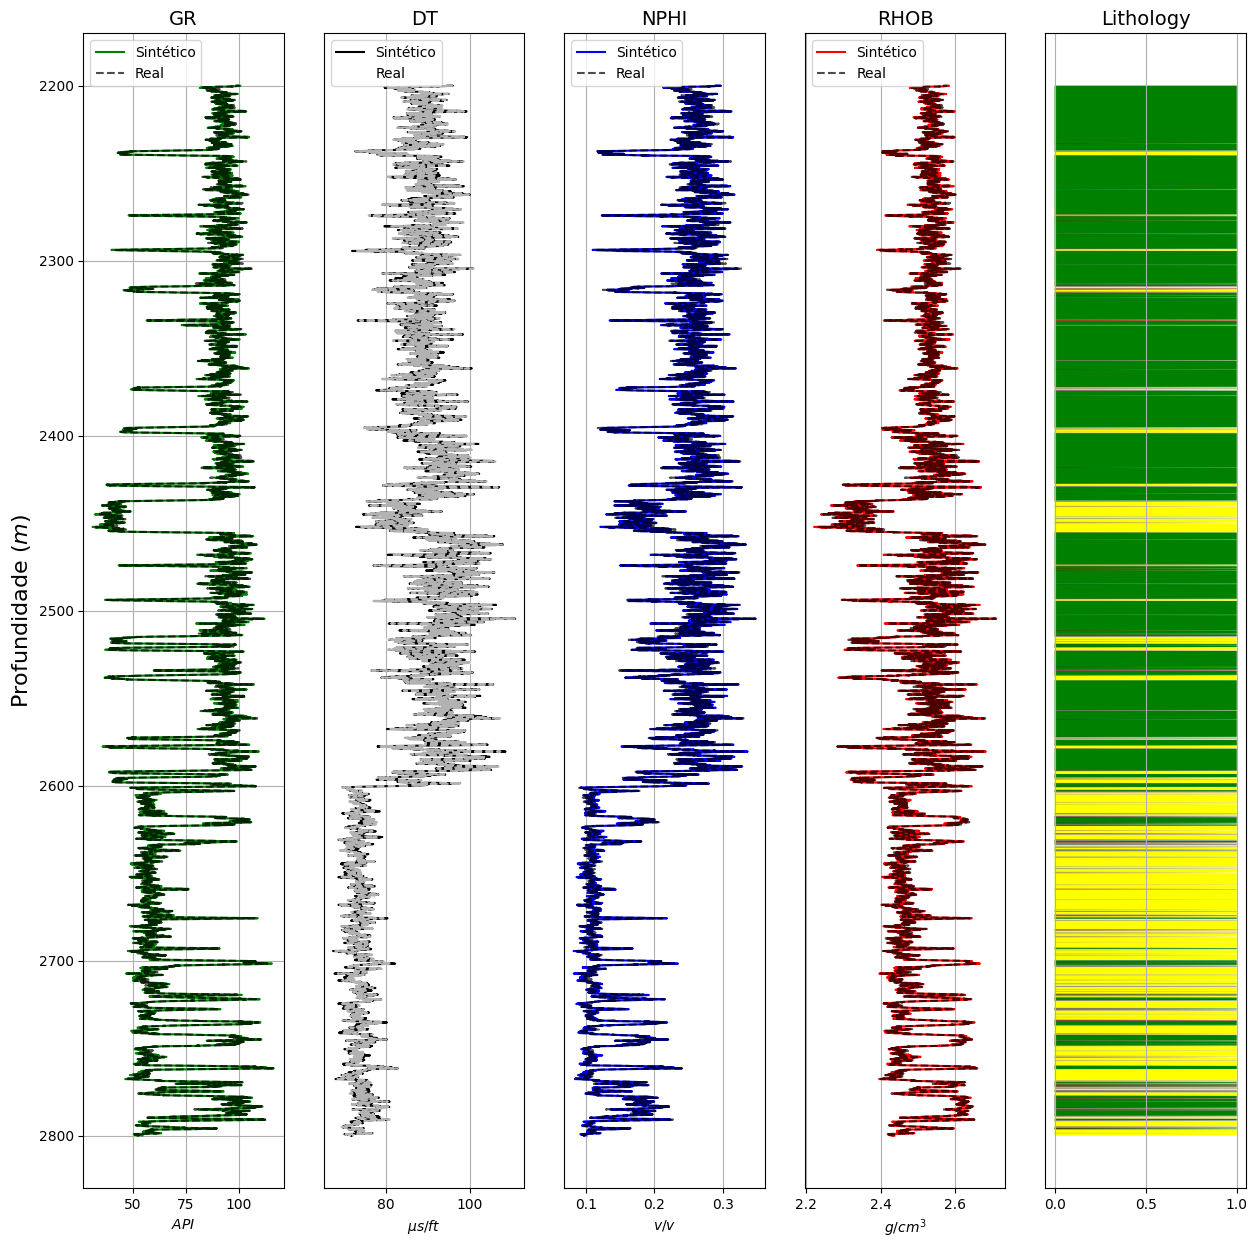

In [61]:
# Adição do ruído aos logs sintéticos
S_GR_final = Ru_gr + GR_smooth
S_DT_final = Ru_dt + DT_smooth
S_NPHI_final = NPHI_smooth + Ru_nphi
S_RHOB_final = RHOB_smooth + Ru_rhob

# ========================================================== #

plt.figure(figsize=(15,15))

plt.subplot(1,5,1)
plt.title("GR",fontsize=14)
plt.gca().invert_yaxis()
plt.plot(S_GR_final,S_DEPTH,'g')
plt.plot(GR_smooth,S_DEPTH,'--k',alpha=0.7)
plt.legend(["Sintético","Real"])
plt.ylabel("Profundidade ($m$)",fontsize=16)
plt.xlabel("$API$")
plt.grid()

plt.subplot(1,5,2)
plt.title("DT",fontsize=14)
plt.gca().invert_yaxis()
plt.plot(S_DT_final,S_DEPTH,'k')
plt.plot(DT_smooth,S_DEPTH,'--w',alpha=0.7)
plt.xlabel("$\mu s / ft$")
plt.legend(["Sintético","Real"])
plt.yticks([])
plt.grid(True)

plt.subplot(1,5,3)
plt.title("NPHI",fontsize=14)
plt.gca().invert_yaxis()
plt.plot(S_NPHI_final,S_DEPTH,'b')
plt.plot(NPHI_smooth,S_DEPTH,'--k',alpha=0.7)
plt.legend(["Sintético","Real"])
plt.yticks([])
plt.xlabel("$v/v$")
plt.grid()

plt.subplot(1,5,4)
plt.title("RHOB",fontsize=14)
plt.gca().invert_yaxis()
plt.plot(S_RHOB_final,S_DEPTH,'r')
plt.plot(RHOB_smooth,S_DEPTH,'--k',alpha=0.7)
plt.legend(["Sintético","Real"])
plt.yticks([])
plt.xlabel("$g/cm^3$")
plt.grid()

plt.subplot(1,5,5)
plt.title("Lithology",fontsize=14)
plt.gca().invert_yaxis()
plito(S_LITO,S_DEPTH,colors)
plt.yticks([])
plt.grid()

# eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp

plt.savefig("C:\\Users\\mmram\\OneDrive\\Área de Trabalho\\pseudo_well.svg",dpi=300)



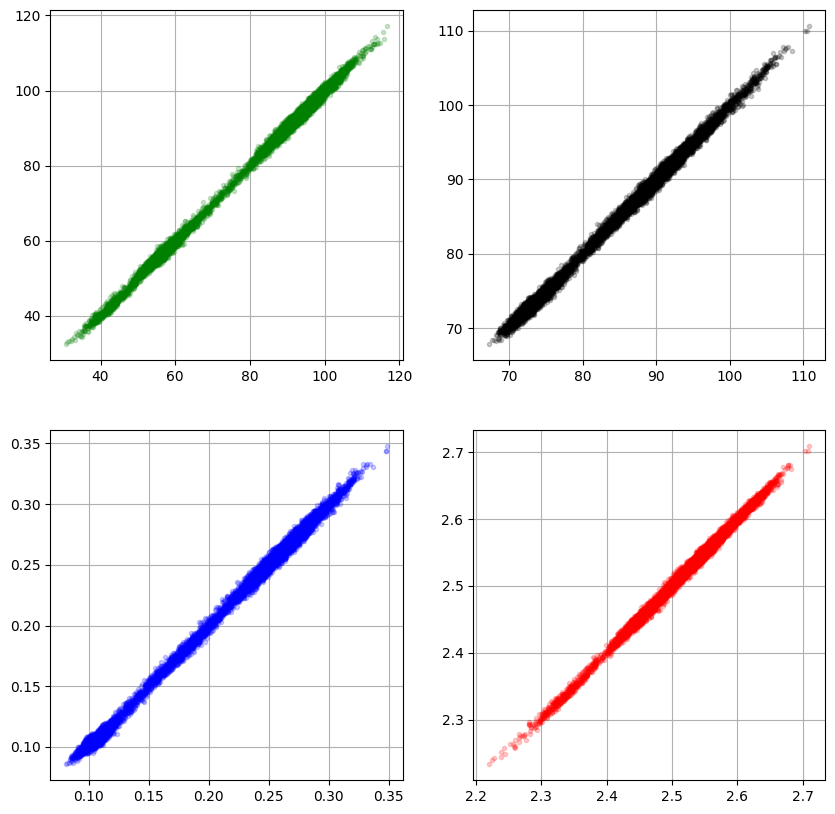

In [32]:
# Visualização dos logs sintéticos e suavizados calculados
# O propósito é visualizar os ruídos
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(S_GR_final,GR_smooth,'.g',alpha=0.2)
plt.grid()

plt.subplot(2,2,2)
plt.plot(S_DT_final,DT_smooth,'.k',alpha=0.2)
plt.grid()

plt.subplot(2,2,3)
plt.plot(S_NPHI_final,NPHI_smooth,'.b',alpha=0.2)
plt.grid()

plt.subplot(2,2,4)
plt.plot(S_RHOB_final,RHOB_smooth,'.r',alpha=0.2)
plt.grid()